# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [448]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame


# Display the data table for preview
combine = pd.merge(study_results,mouse_metadata, how="inner")
combine.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [97]:
# Checking the number of mice.
#combine["Mouse ID"].count()
#len(study_results)

#len(mouse_metadata)

#mouse_metadata["Mouse ID"].count()
combine.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [99]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combine[combine.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [113]:
# Optional: Get all the data for the duplicate mouse ID.
combine.loc[combine["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [161]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine[combine['Mouse ID'].isin(duplicate_mice_ids)==False]
#clean_df.loc[clean_df['Mouse ID']=='g989']

In [137]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].value_counts())

248

In [184]:
 
clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Summary Statistics

In [194]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
summary = summary.rename(columns = {"mean": "Mean Tumor Volume",
                                    "median": "Median Tumor Volume",
                                   "var":"Tumor Volume Variance",
                                    "std":"Tumor Volume Std. Dev.",
                                   "sem": "Tumor Volume Std. Err."})
summary

Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.320930           50.446266             43.852013   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                            
             Tumor Volume Std. Dev. Tumor Volume Std. Err.  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.622085               0.544332  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

In [196]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [328]:
#bar_data = clean_df.groupby("Drug Regimen").agg({"Timepoint":"count"})
#values = bar_data["Timepoint"].to_list()
#indices = bar_data["Timepoint"].index.to_list()
#indices
clean_df["Drug Regimen"].value_counts()

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

<Axes: xlabel='Drug Regimen'>

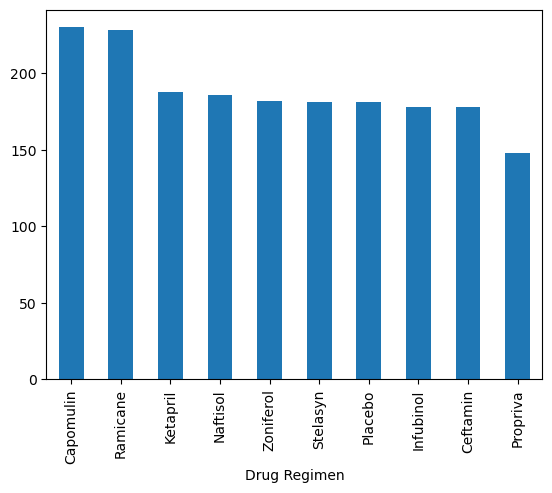

In [320]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#plt.bar(indices, values)
#plt.xlabel("Drug Regimen")
#plt.ylabel("# of observed Mouse Timepoints")
#plt.show()

regimen_counts = clean_df['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar')

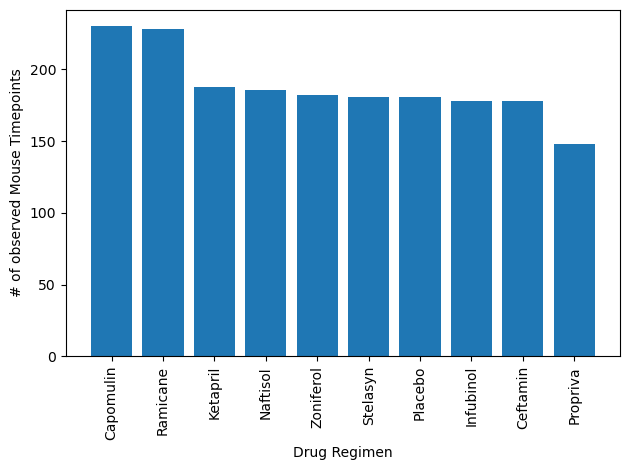

In [334]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_df['Drug Regimen'].value_counts()
plt.bar(regimen_counts.index, regimen_counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()

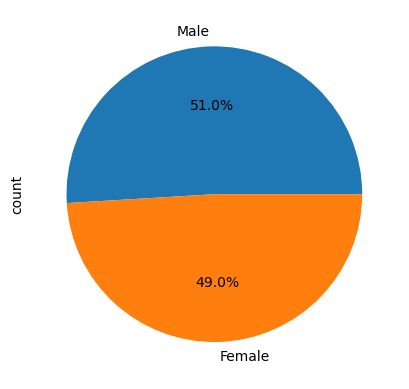

In [370]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
num_of_gender = clean_df["Sex"].value_counts()
plot = num_of_gender.plot(kind="pie", autopct='%1.1f%%')
# Make the pie chart


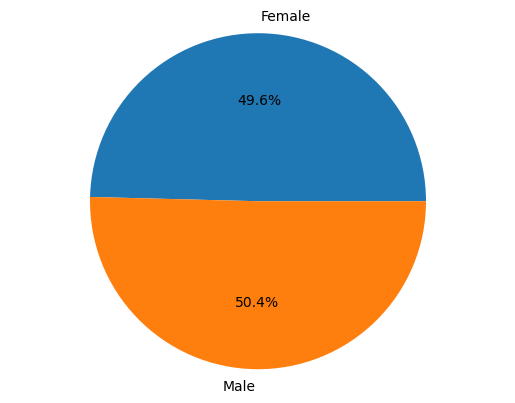

In [380]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart

gender_counts = clean_df.groupby('Sex')['Mouse ID'].nunique()

# Create the pie chart
 
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()


## Quartiles, Outliers and Boxplots

In [452]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()
# Start by getting the last (greatest) timepoint for each mouse
merged_df = pd.merge(clean_df, last_timepoint, on=['Mouse ID', 'Timepoint'], how='inner')


treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = merged_df[merged_df['Drug Regimen'].isin(treatment_regimens)]


In [454]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for drug in treatment_list:
 
    final_tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    tumor_vol_data.append(final_tumor_vol)
    
    
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


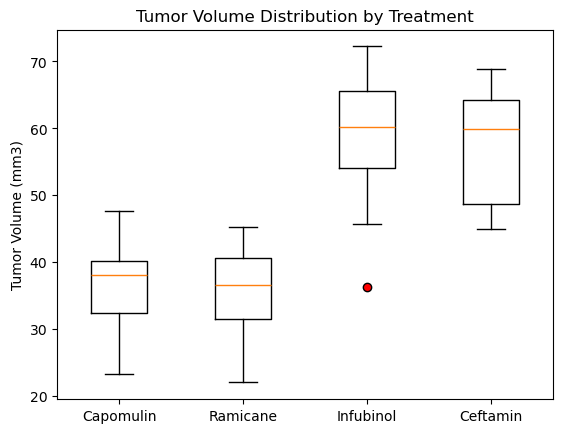

In [456]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Distribution by Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, labels=treatment_list, flierprops={'markerfacecolor': 'red', 'marker': 'o'})
plt.show()


## Line and Scatter Plots

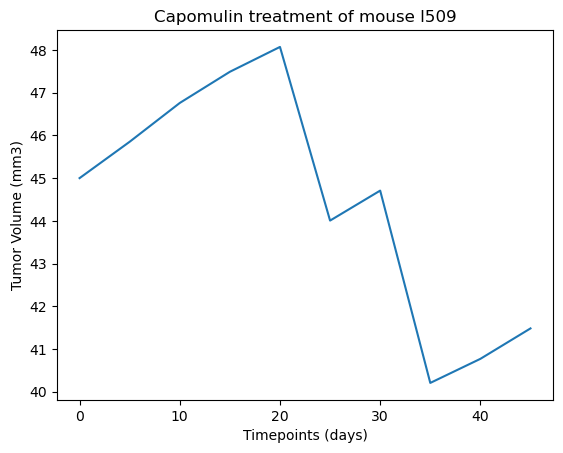

In [422]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_capomulin = clean_df.loc[clean_df["Mouse ID"] == "l509"]
#plt(mouse_capomulin, kind="line")
#mouse_capomulin
#mouse_capomulin.plot(x="Tumor Volume (mm3)", y="Timepoint", kind="line")
tumor = mouse_capomulin["Tumor Volume (mm3)"].to_list()
time = mouse_capomulin["Timepoint"].to_list()
plt.plot(time,tumor)
plt.xlabel("Timepoints (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

In [442]:
#group = clean_df.groupby("Mouse ID")
#group.agg({"":"mean"})

TypeError: agg function failed [how->mean,dtype->object]

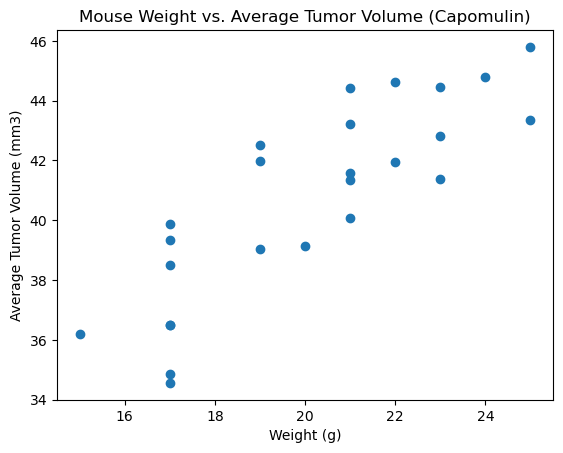

In [446]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#mouse_capomulin = clean_df.loc[clean_df["Mouse ID"] == "l509"]
#peso = clean_df["Weight (g)"].to_list()
#tumor = clean_df["Tumor Volume (mm3)"].to_list()
#plt.scatter(peso, tumor)
#plt.show()
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(mouse_weights, average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.841936342469472


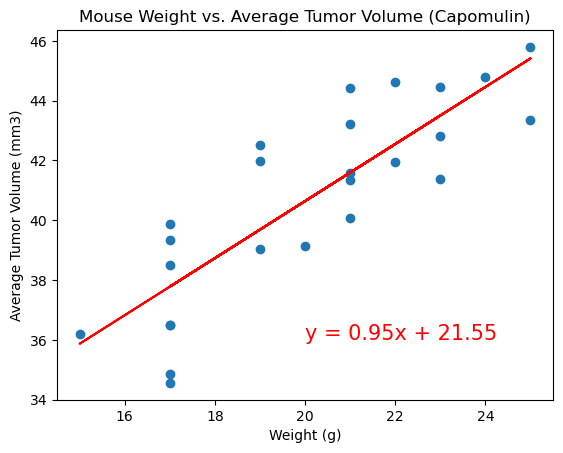

In [450]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient, p_value = st.pearsonr(mouse_weights, average_tumor_volume)


print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weights, average_tumor_volume)
regress_values = mouse_weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(mouse_weights, average_tumor_volume)
plt.plot(mouse_weights,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.show()

